# Séries Temporais

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# 1. Gerando uma série temporal simples (pode ser substituído pelos seus dados)
np.random.seed(42)
time = np.arange(100)
values = 0.5 * time + 2 + np.random.normal(0, 5, size=time.shape)

# Colocando os dados em um DataFrame
df = pd.DataFrame({'time': time, 'value': values})

# Criando 'lag features' (valores defasados) para usar no modelo
df['lag_1'] = df['value'].shift(1)
df['lag_2'] = df['value'].shift(2)
df.dropna(inplace=True)

# Separando variáveis dependentes e independentes
X = df[['lag_1', 'lag_2']]  # Features (lags)
y = df['value']  # Target (a variável que queremos prever)

In [16]:
# 2. Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
# 3. Treinando o modelo (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# 4. Previsões
y_pred = model.predict(X_test)

In [19]:
# 5. Métricas
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 9.301054298309952
Root Mean Squared Error (RMSE): 10.304247808449514


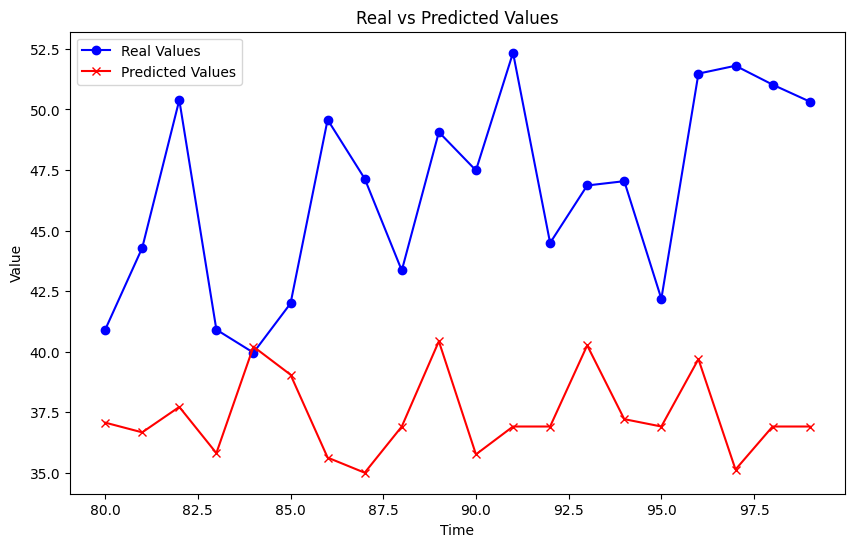

In [20]:
# 6. Plotando os resultados: valores reais vs previsões
plt.figure(figsize=(10,6))

# Ajustando o tempo para coincidir com o número de pontos no conjunto de teste
time_test = df['time'].iloc[len(X_train):]  # Extrair o tempo correspondente ao conjunto de teste

plt.plot(time_test, y_test, label='Real Values', color='blue', marker='o')
plt.plot(time_test, y_pred, label='Predicted Values', color='red', marker='x')

plt.legend()
plt.title('Real vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Com K-Fold

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Exemplo de valores (suponha que temos mais dados reais)
X = np.random.rand(100, 2)  # Exemplo de features aleatórias
y = np.random.rand(100)  # Exemplo de valores alvo aleatórios

# 1. Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Criando o modelo de RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Validação cruzada no conjunto de treino (usando 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Convertendo os scores negativos para positivos (valores absolutos) e calculando a média do MAE
cross_val_mae = -cross_val_scores
print(f"Cross-Validated MAE (treino): {cross_val_mae.mean()}")

# 4. Treinando o modelo com todo o conjunto de treino
model.fit(X_train, y_train)

# 5. Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# 6. Calculando as métricas no conjunto de teste
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE) no conjunto de teste: {mae_test}")
print(f"Root Mean Squared Error (RMSE) no conjunto de teste: {rmse_test}")


Cross-Validated MAE (treino): 0.2891702803143733
Mean Absolute Error (MAE) no conjunto de teste: 0.26508886958964517
Root Mean Squared Error (RMSE) no conjunto de teste: 0.3153179028227787


# Com Grid-Search

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Exemplo de dados (substitua com seus próprios dados)
X = np.random.rand(100, 2)  # Exemplo de features aleatórias
y = np.random.rand(100)  # Exemplo de valores alvo aleatórios

# 1. Definindo o modelo base
model = RandomForestRegressor(random_state=42)

# 2. Definindo os parâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30]  # Profundidade máxima das árvores
}

# 3. Definindo o scorer para o MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 4. Configurando o Grid Search com K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mae_scorer, cv=kf)

# 5. Executando o Grid Search
grid_search.fit(X, y)

# 6. Obtendo os melhores parâmetros e o melhor MAE
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print(f"Melhor MAE encontrado: {-grid_search.best_score_}")

# 7. Treinando o modelo com os melhores parâmetros e avaliando em um conjunto de teste separado
# (Dividindo os dados em treino e teste novamente para a avaliação final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Fazendo previsões e avaliando o modelo final
y_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) no conjunto de teste: {mae_test}")


Melhores parâmetros encontrados:
{'max_depth': 20, 'n_estimators': 100}
Melhor MAE encontrado: 0.2938751085391548
Mean Absolute Error (MAE) no conjunto de teste: 0.2678523853305486
